In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [263]:
cell_n = 3001
v = 'v2'
df = pd.read_csv(f'./save/ipsc_perturbation_sampling_search_1024_masks_RECON_REF_multi_cells_{v}_cell_{cell_n}.csv', index_col = 0)#.iloc[6:]
df_oksm = pd.read_csv(f'./save/ipsc_perturbation_sampling_search_oksm_1024_masks_RECON_REF_multi_cells_{v}_cell_{cell_n}.csv', index_col = 0)

In [264]:
df_oksm['cell'] = 0
df_oksm['cell'] = df_oksm.reset_index()['index'].apply(lambda x: int(x[-x[::-1].index('_'):])).values

In [265]:
df_oksm['gene'] = df_oksm.reset_index()['index'].apply(lambda x: x[:-x[::-1].index('_')-1]).values

In [266]:
df_oksm_mean = df_oksm.groupby('gene').mean()
#df_oksm.groupby('gene').agg(['mean','std'])

In [267]:
oksm_mask = ['SOX2' in i or'KLF4' in i or 'MYC' in i or 'POU5F1'in i or 'NANOG'in i for i in df.index.tolist()]
oksm_mask2 = [sum(gene in i for gene in ['SOX2', 'KLF4', 'MYC', 'POU5F1', 'NANOG']) >= 2 for i in df.index.tolist()]
np.sum(oksm_mask)

4

In [268]:
df.shape

(100, 12)

In [269]:
for t in ['euclid_distance', 'pearson_corr']:
    order = []
    for time in ['D0-fm','D4-fm','D8-fm','D20-nr','P3-nr','P20-nr']:
        order.append(f'{t}_{time}')
    #print(df.loc[:,order].round(3).head(10).to_latex(index=True, float_format=f"%.3f"))
df.loc[:,order].round(3).head(10)

,pearson_corr_D0-fm,pearson_corr_D4-fm,pearson_corr_D8-fm,pearson_corr_D20-nr,pearson_corr_P3-nr,pearson_corr_P20-nr
FOXN3_NRF1_TAF1A,0.958,0.954,0.951,0.941,0.942,0.930
SUB1_MED6_ASCC1,0.956,0.952,0.948,0.938,0.938,0.927
TRIB3_RELB_ZFP2,0.952,0.948,0.944,0.934,0.935,0.922
AHRR_ZNF266_ZC3H10,0.956,0.953,0.950,0.940,0.941,0.929
PARP12_TSC22D1_MYBBP1A,0.955,0.951,0.948,0.938,0.938,0.927
RC3H1_MYT1_SATB1,0.957,0.954,0.951,0.940,0.941,0.930
TAB2_PIN1_ZNF90,0.957,0.954,0.951,0.940,0.941,0.929
TOE1_MGA_ZFP2,0.955,0.952,0.948,0.938,0.939,0.927
SLC4A10_HLA-DQB1_RIPK3,0.956,0.954,0.951,0.941,0.941,0.930
CCDC124_STAG1_LARP7,0.954,0.950,0.947,0.937,0.938,0.925


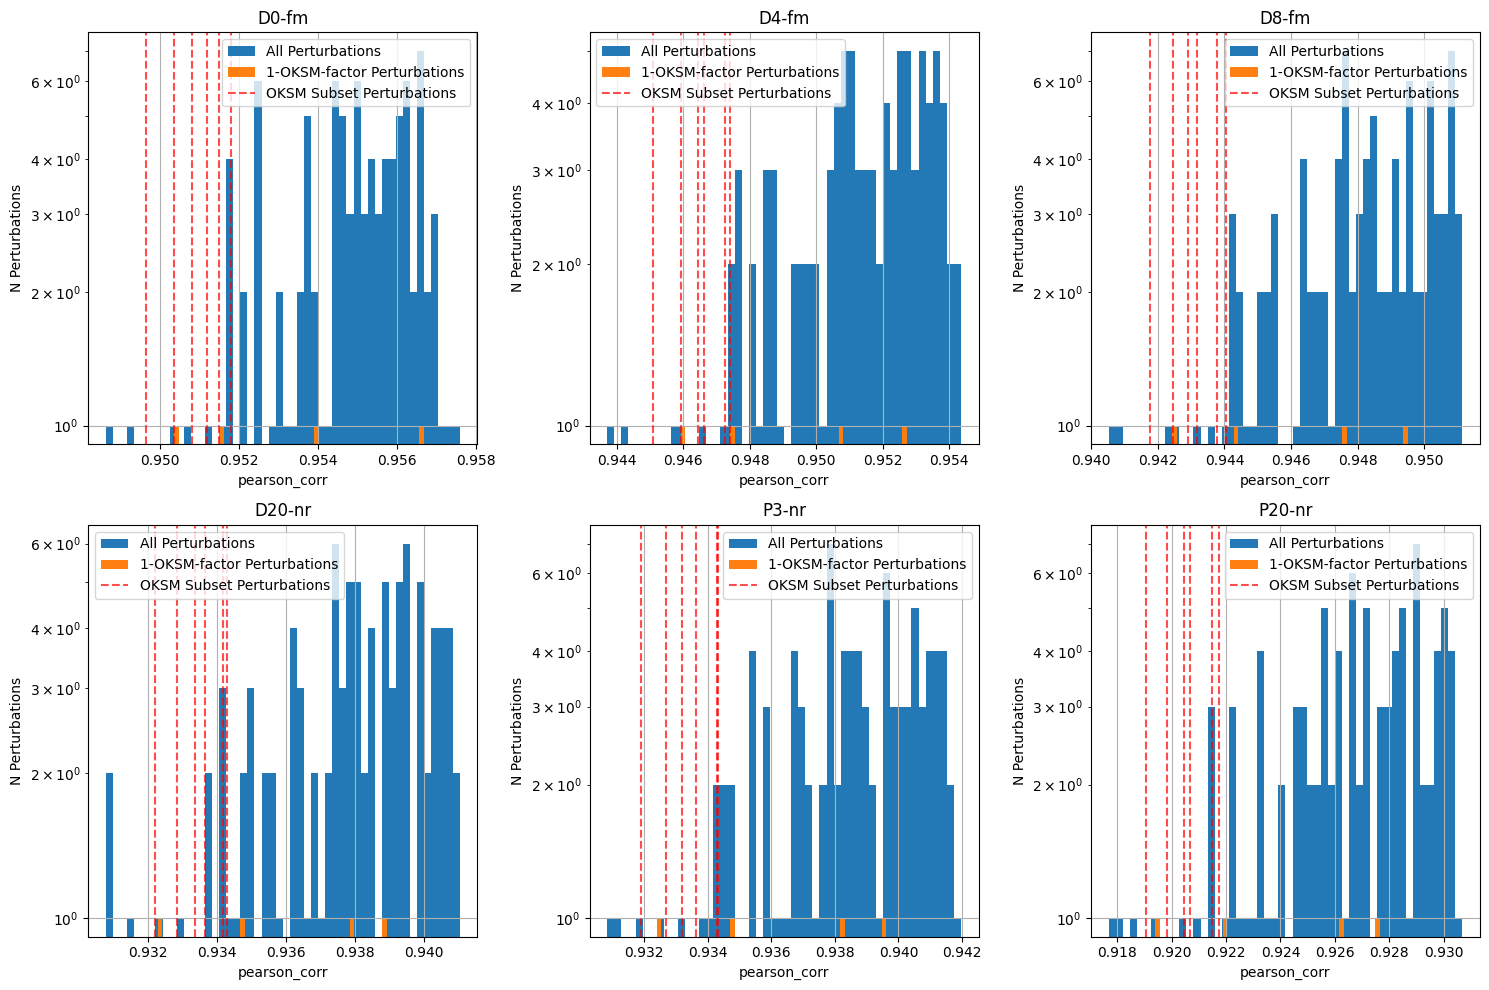

In [270]:
# Parameters
for sim_type in ['pearson_corr']:
    repr_points = ['D0-fm', 'D4-fm', 'D8-fm', 'D20-nr', 'P3-nr', 'P20-nr']
    
    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows and 3 columns
    axes = axes.flatten()  # Flatten to easily iterate over axes
    
    # Loop over each representation point and plot histogram
    for i, repr_point in enumerate(repr_points):
        ax = axes[i]  # Get the specific subplot axis
        
        # Plot histograms on the specific axis
        df.loc[:, f'{sim_type}_{repr_point}'].hist(bins=50, log=True, ax=ax, alpha=0.99, label='All Perturbations')
        df.loc[oksm_mask, f'{sim_type}_{repr_point}'].hist(bins=50, log=True, ax=ax, alpha=0.99, label='1-OKSM-factor Perturbations')
        #df.loc[oksm_mask, f'{sim_type}_{repr_point}'].hist(bins=50, log=True, ax=ax, alpha=0.99, label='OKSM-containing Perturbations')
    
        # Plot df_oksm as vertical dashed red lines with labels
        label = 'OKSM Subset Perturbations'
        for value in df_oksm_mean[f'{sim_type}_{repr_point}']:
            ax.axvline(value, color='red', linestyle='--', alpha=0.7, label=label)
            label=None
        
        # Set labels and title
        ax.set_xlabel(sim_type)
        ax.set_ylabel('N Perturbations')
        ax.set_title(f'{repr_point}')
        ax.legend()
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.savefig(f'./save/pert_ipsc_corr_panel_MULTI_CELL_{sim_type}_cell_{cell_n}.png',bbox_inches='tight')
    plt.show()

In [271]:
rep_order = ['pearson_corr_D0-fm', 'pearson_corr_D4-fm', 'pearson_corr_D8-fm', 'pearson_corr_D20-nr','pearson_corr_P3-nr','pearson_corr_P20-nr']
rep_order_eu = ['euclid_distance_D0-fm', 'euclid_distance_D4-fm', 'euclid_distance_D8-fm', 'euclid_distance_D20-nr','euclid_distance_P3-nr','euclid_distance_P20-nr']
#rep_order = ['pearson_corr_D0-fm', 'pearson_corr_D8-fm', 'pearson_corr_D20-nr','pearson_corr_P20-nr']

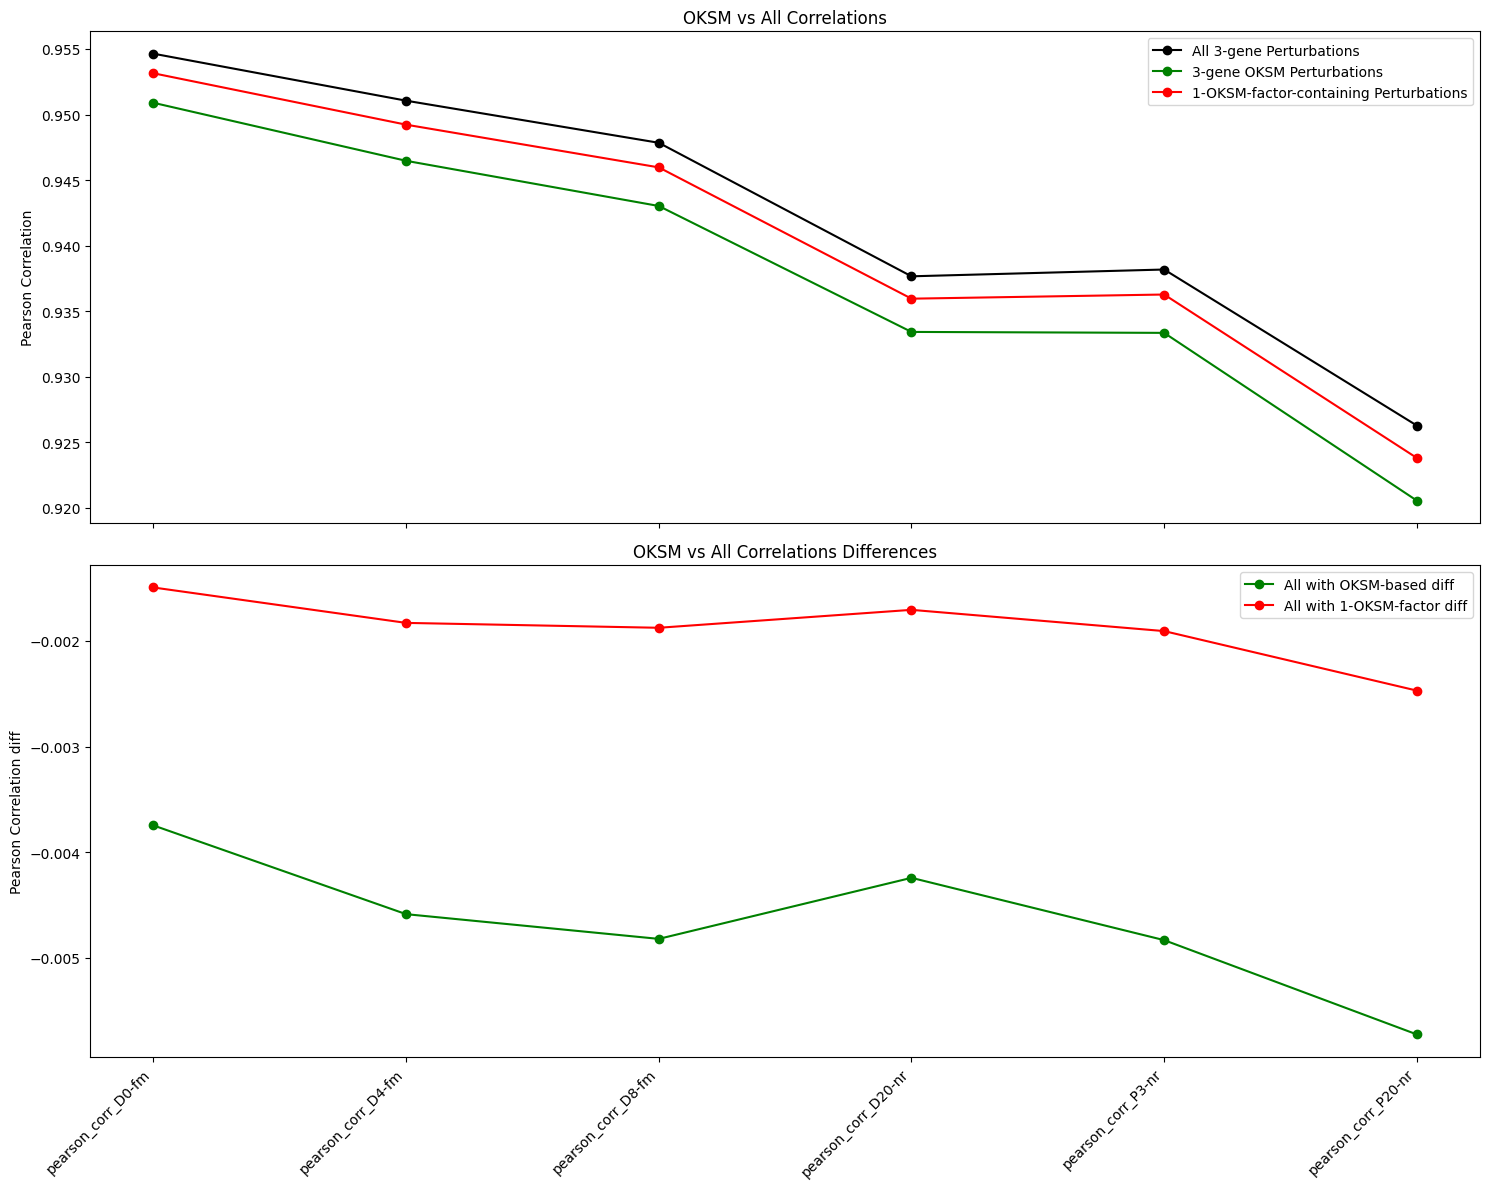

In [272]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Plot the first set of correlations
ax1 = axes[0]
df.loc[:, rep_order].mean().plot(ax=ax1, label='All 3-gene Perturbations', c='black', style='o-')
df_oksm.drop(columns=['gene', 'cell']).loc[:, rep_order].mean().plot(ax=ax1, label='3-gene OKSM Perturbations', c='green', style='o-')
df.loc[oksm_mask].loc[:, rep_order].mean().plot(ax=ax1, label='1-OKSM-factor-containing Perturbations', c='red', style='o-')
ax1.set_ylabel('Pearson Correlation')
ax1.legend()
ax1.set_title('OKSM vs All Correlations')

# Plot the second set of correlations differences
ax2 = axes[1]
(df_oksm.drop(columns=['gene', 'cell']).loc[:, rep_order].mean() - df.loc[:, rep_order].mean()).plot(ax=ax2, label='All with OKSM-based diff', style='o-',c='green')
(df.loc[oksm_mask, rep_order].mean() - df.loc[:, rep_order].mean()).plot(ax=ax2, label='All with 1-OKSM-factor diff', style='o-',c='red')
ax2.set_xticks(range(len(rep_order)))
ax2.set_xticklabels(rep_order, rotation=45, ha='right')
ax2.set_ylabel('Pearson Correlation diff')
ax2.legend()
ax2.set_title('OKSM vs All Correlations Differences')

# Save the figures as PNG files
plt.savefig(f'./save/OKSM_vs_all_correlation_cell_{cell_n}_subplot.png', bbox_inches='tight')

# Show the subplots
plt.tight_layout()
plt.show()


In [273]:
df.sort_values(by='pearson_corr_P20-nr',ascending=False).head(20).loc[:,rep_order]

,pearson_corr_D0-fm,pearson_corr_D4-fm,pearson_corr_D8-fm,pearson_corr_D20-nr,pearson_corr_P3-nr,pearson_corr_P20-nr
ELF2_NUP98_ZNF71,0.957329,0.954057,0.950929,0.940956,0.941969,0.930687
NUFIP1_TRIM5_SALL3,0.957114,0.954354,0.951141,0.940742,0.941512,0.930312
FOXN3_NRF1_TAF1A,0.957577,0.954222,0.951139,0.940735,0.941601,0.930289
ZBTB17_BMP4_CCDC3,0.956804,0.953843,0.950861,0.940653,0.941337,0.930221
RGS11_SCML2_LIN28B,0.956323,0.953284,0.950225,0.941033,0.941604,0.930185
SLC4A10_HLA-DQB1_RIPK3,0.956445,0.953585,0.950648,0.940653,0.941353,0.930160
GON4L_MYB_ZNF598,0.956582,0.953885,0.950904,0.940010,0.940861,0.930089
RC3H1_MYT1_SATB1,0.956980,0.954003,0.950872,0.940446,0.941172,0.930038
ZBTB45_KAT7_HINFP,0.956639,0.953758,0.950701,0.940307,0.941341,0.929915
PSMC5_ZNF266_BOLA2B,0.956611,0.953585,0.950725,0.940453,0.941103,0.929912
